<a href="https://colab.research.google.com/github/Shils123/Project1/blob/main/Clustering_aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
f = open('/content/gdrive/MyDrive/Colab Notebooks/aircraft_new.csv',) 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/aircraft_new.csv')


In [ ]:
df.head()

,Speed,Size,Range,Payload Capacity
0,1024,105,3457,648
1,1950,111,6964,2079
2,1014,98,3192,2927
3,1165,175,8727,2039
4,1457,128,2388,9765


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Speed             100 non-null    int64
 1   Size              100 non-null    int64
 2   Range             100 non-null    int64
 3   Payload Capacity  100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


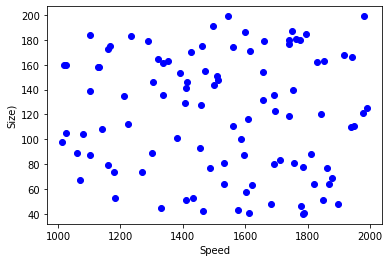

In [ ]:
X = df[["Speed", "Size"]]
# Visualize data point
plt.scatter(X["Speed"], X["Size"], c="blue")
plt.xlabel("Speed")
plt.ylabel("Size)")
plt.show()

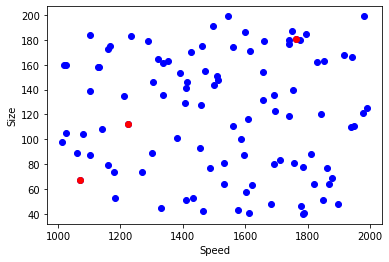

In [ ]:
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["Speed"], X["Size"], c="blue")
plt.scatter(Centroids["Speed"], Centroids["Size"], c="red")
plt.xlabel("Speed")
plt.ylabel("Size")
plt.show()

In [ ]:
Centroids

,Speed,Size
32,1071,67
83,1762,181
56,1225,112


In [ ]:

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Speed"]-row_d["Speed"])**2
            d2 = (row_c["Size"]-row_d["Size"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Size", "Speed"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Size'] - Centroids['Size']).sum() + (Centroids_new['Speed'] - Centroids['Speed']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Size","Speed"]]

<ipython-input-9-ff7706ea19d4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


119.07785547785538
79.00613699244026
27.067017630714346
24.93953823953818
37.79790092947982
19.35576923076941
11.515891417733698
0.0


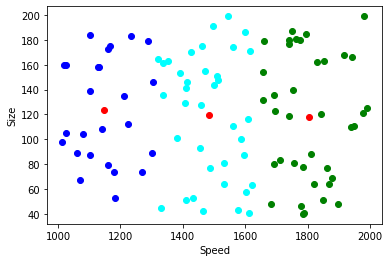

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Speed"],data["Size"],c=color[k])
plt.scatter(Centroids["Speed"],Centroids["Size"],c='red')
plt.xlabel('Speed')
plt.ylabel('Size')
plt.show()